In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [122]:
df=pd.read_csv('/content/wine_data.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
20995,9.7,1.020,0.91,50.00,0.412,114.6,181.7,1.02085,3.30,0.89,12.0,9
20996,10.2,0.610,0.88,53.80,0.250,62.4,204.7,1.02776,3.52,1.14,9.7,9
20997,13.4,0.460,1.04,52.10,0.449,63.0,273.5,1.02618,2.89,1.76,9.3,9
20998,6.6,1.030,1.09,25.30,0.138,179.8,295.0,1.02476,2.94,1.54,12.9,9


In [123]:
df.isnull().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


In [124]:
#Statistical measures of the dataset
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


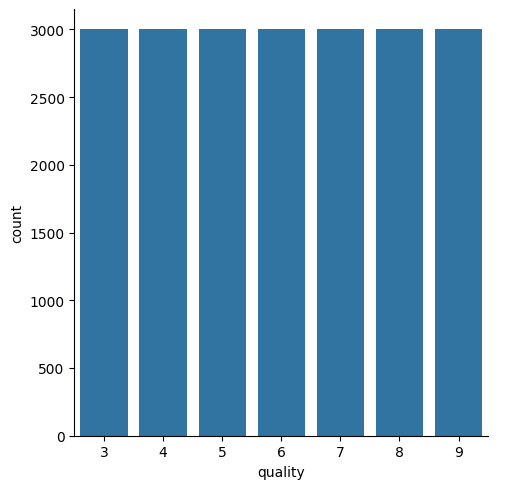

In [125]:
#no of values for each quality
sns.catplot(x= 'quality',data=df,kind= 'count')

<Axes: xlabel='quality', ylabel='chlorides'>

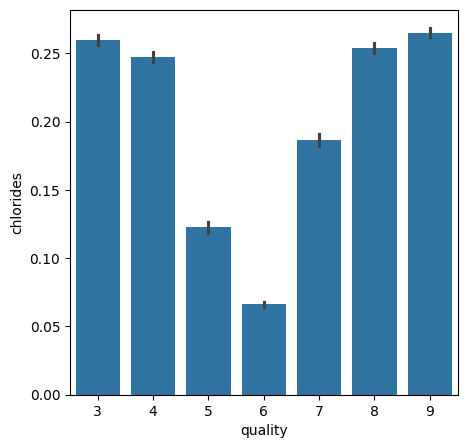

In [126]:
#chlorides vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'chlorides',data=df)

<Axes: xlabel='quality', ylabel='pH'>

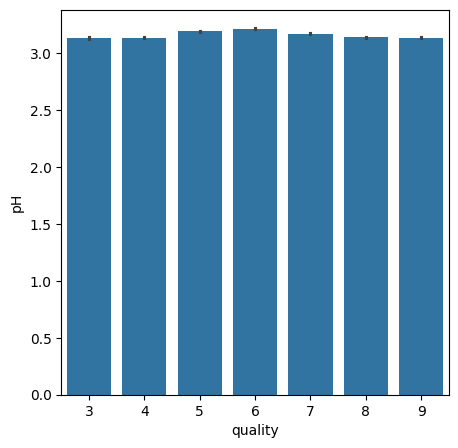

In [127]:
#pH vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'pH',data=df)

<Axes: xlabel='quality', ylabel='sulphates'>

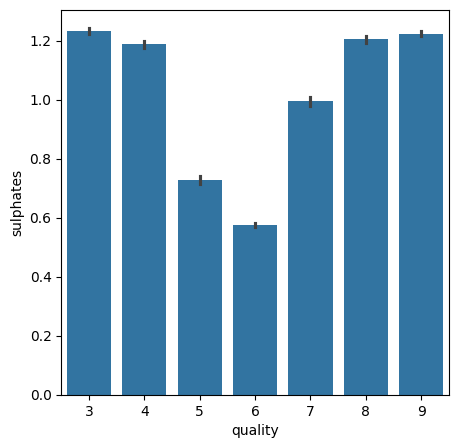

In [128]:
#sulphates vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'sulphates',data=df)

<Axes: xlabel='quality', ylabel='alcohol'>

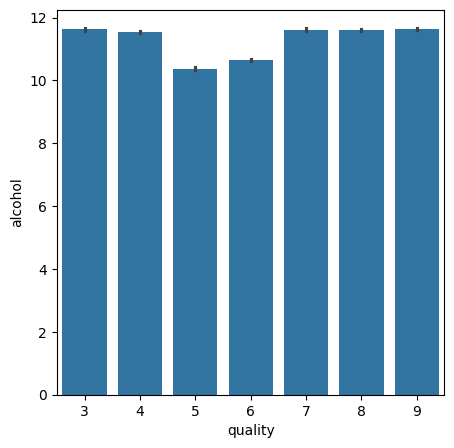

In [129]:
#alcohol vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'alcohol',data=df)

Correlation

Positive correlation -Negative correlation

In [130]:
correlation= df.corr()

<Axes: >

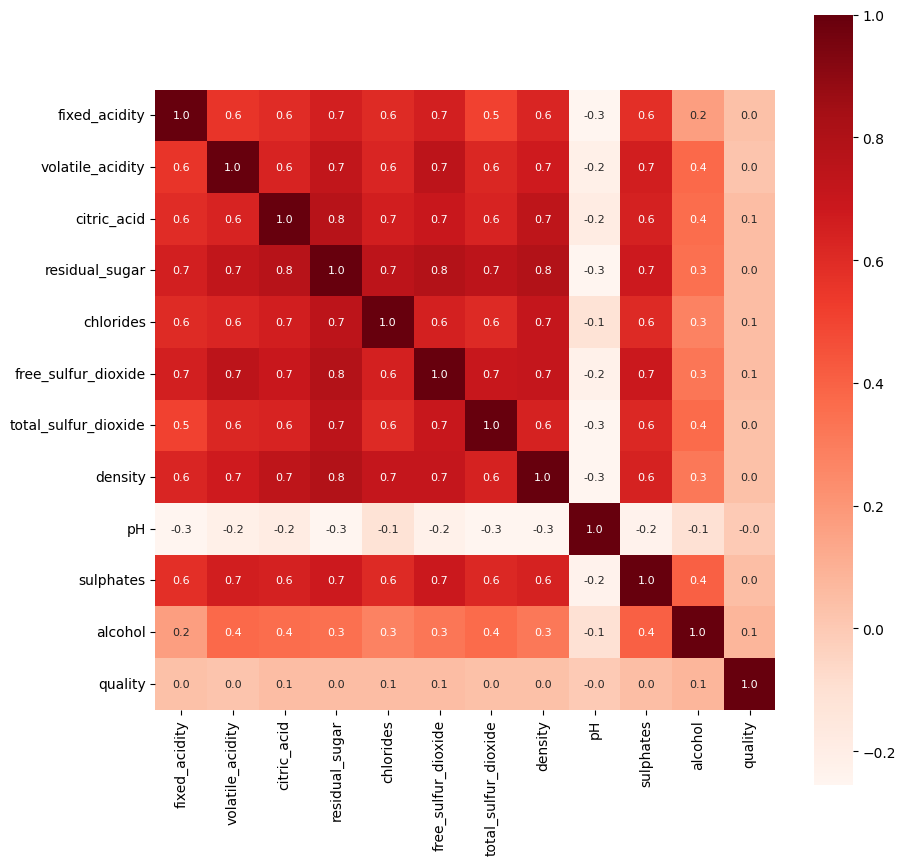

In [131]:
#Constructing a heatmap to understand the correlation between columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap = 'Reds')

In [132]:
def categorize_ranking(quality):
    if quality in [3, 4]:
        return 'Poor'
    elif quality in [5, 6]:
        return 'Average'
    elif quality in [7,8,9 ]:
        return 'Excellent'

In [133]:
#Create a new 'categorize_ranking' column
df['quality_category'] = df['quality'].apply(categorize_ranking)
ranking_counts = df['quality_category'].value_counts()

In [134]:
# Initialize Label Encoder
label_encoder = LabelEncoder()

# Convert categorical labels into numerical values
df['quality_category'] = label_encoder.fit_transform(df['quality_category'])

# Define X and y again with numerical labels
x = df.drop(columns=['quality', 'quality_category'])
y = df['quality_category']

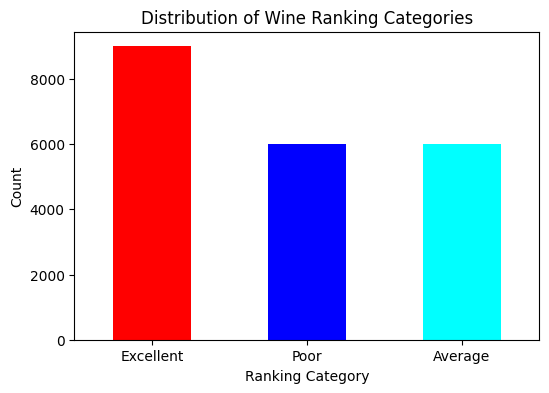

In [135]:
# Plot the distribution
plt.figure(figsize=(6,4))
ranking_counts.plot(kind='bar', color=['red', 'blue', 'cyan'])
plt.xlabel("Ranking Category")
plt.ylabel("Count")
plt.title("Distribution of Wine Ranking Categories")
plt.xticks(rotation=0)
plt.show()

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.59

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1200
           1       0.53      0.80      0.64      1800
           2       0.39      0.07      0.11      1200

    accuracy                           0.59      4200
   macro avg       0.56      0.56      0.51      4200
weighted avg       0.56      0.59      0.53      4200



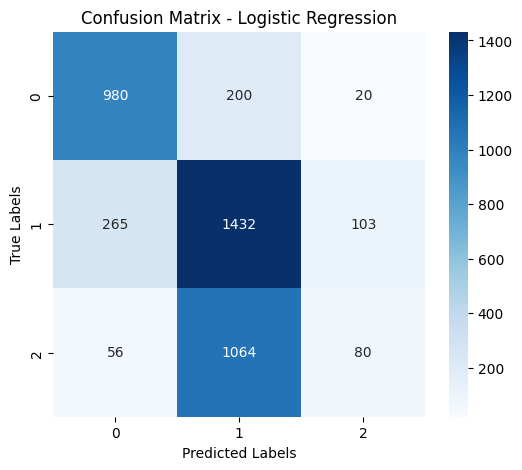

In [137]:
#Normalize Features using StandardScaler
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

# Step 5: Train Logistic Regression Model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
log_reg.fit(x_train, y_train)

# Step 6: Make Predictions
y_pred = log_reg.predict(x_test)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [138]:
# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
model.fit(x_train, y_train)

#using the trained model to predict the test set
y_pred = model.predict(x_test)

Model Accuracy: 0.77


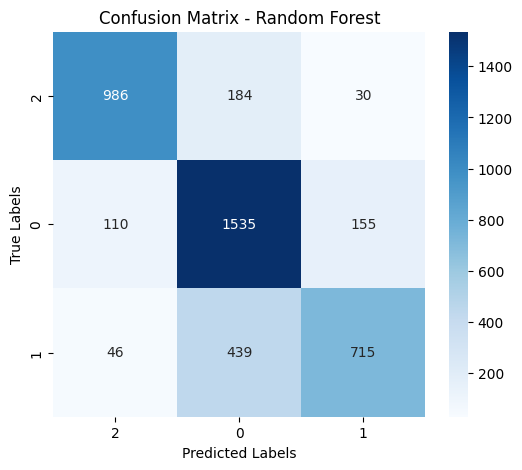

In [139]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Random Forest")
plt.show()

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Best accuracy: 0.66
XGBoost Model Accuracy Confusin Matrix: 0.67


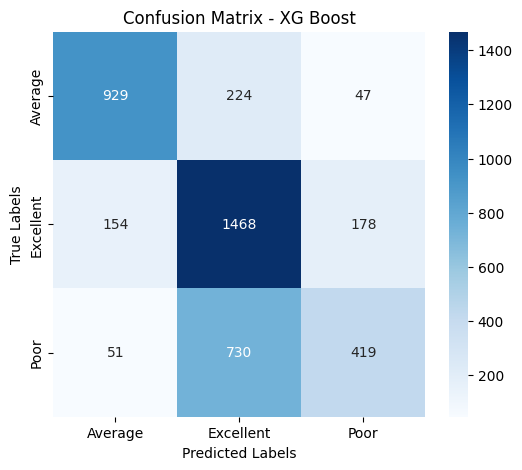

In [140]:
# Define a smaller parameter grid for tuning
param_dist = {
    'n_estimators': [100, 200],  # Fewer trees
    'learning_rate': [0.05, 0.1],  # Fewer learning rates
    'max_depth': [3, 5],  # Fewer depths
    'subsample': [0.8, 1.0],  # Fewer subsample values
    'colsample_bytree': [0.8, 1.0],  # Fewer feature fractions
    'gamma': [0, 0.1],  # Fewer gamma values
    'reg_alpha': [0, 0.1],  # Fewer L1 regularization values
    'reg_lambda': [0, 0.1]  # Fewer L2 regularization values
}

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter combinations to try (reduce for speed)
    scoring='accuracy',
    cv=2,  # Fewer cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model
random_search.fit(x_train, y_train)

# Best parameters and best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best accuracy: {random_search.best_score_:.2f}")

# Make predictions with the best model
best_xgb_model = random_search.best_estimator_
y_pred = best_xgb_model.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy Confusin Matrix: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - XG Boost")
plt.show()